In [4]:
import numpy as np
import seaborn as sb; sb.set()
import matplotlib.pyplot as plt

## Convert to bio-stochastic matrix. (doubly stochastic)
This code uses the method of the Sinkhorn paper:

Sinkhorn, R. (1964). A relationship between arbitrary positive matrices and doubly stochastic matrices. The Annals of Mathematical Statistics, 35(2):876–879.)

In [5]:
def convergedTestBio(matrix, threshold=0.000001):
    localMatrix = np.copy(matrix).astype(float)
    e1 = sum(abs(np.sum(localMatrix, axis=0) - 1))
    e2 = sum(abs(np.sum(localMatrix, axis=1) - 1))
    return (e1 + e2) > threshold
    
def OneStepBio(matrix):
    """ Here we will do one step towards
        Making a given matrix a bio-stochastic one        
        It does what OneStep does                         
    """
    # copy the input so that the original input is not changed.
    localMatrix = np.copy(matrix).astype(float)
    
    # Divide each row by sum of the entries in the given row.
    localMatrix = np.dot(np.diag(1/np.sum(localMatrix, axis=1)), localMatrix)
    
    # Divide each column by sum of the elements in the given column.
    localMatrix = np.dot(localMatrix, np.diag(1/np.sum(localMatrix, axis=0)))
    localMatrix = np.triu(localMatrix) + np.transpose(np.triu(localMatrix,1))
    return localMatrix
    

def MakeBistochastic(matrix):
    localMatrix = np.copy(matrix).astype(float)
    while (convergedTestBio(localMatrix)):
        localMatrix = OneStepBio(localMatrix)
    return localMatrix

In [6]:
A = np.random.randn(10,10)
B = MakeBistochastic(A)

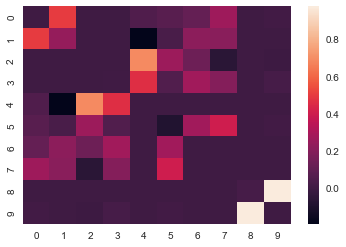

In [7]:
ax = sb.heatmap(B)
plt.show()